<a href="https://colab.research.google.com/github/arimbawa/Big-Data/blob/main/5_b_Text_Mining_%26_Natural_Language_Processing_(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Mining & Natural Language Processing (NLP)
**Learning Objectives:**

By the end of this module, students will be able to:

1. Preprocess raw text (tokenization, stopword removal, stemming/lemmatization).

2. Apply text mining techniques to explore word frequencies.

3. Use NLTK and scikit-learn for NLP basics.

4. Build simple sentiment analysis on Twitter data.

# 1 Setup Libraries

In [1]:
!pip install nltk scikit-learn wordcloud
import nltk

# Download required datasets
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# 2 Sample Data (Twitter Dataset from Module 1)

Here we reuse the tweets you collected earlier with Tweepy.
If you don’t have them, here’s a fallback dataset:

In [2]:
# Example: Replace with your collected tweets
tweets = [
    "I love studying NLP and Python!",
    "The weather is terrible today. I feel sad.",
    "AI and machine learning are the future.",
    "I am so happy with my new research results!",
    "This project is frustrating, but I will finish it."
]

# 3 Text Preprocessing

In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import nltk


stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text.lower()) # lowercasing + tokenizing
    tokens = [t for t in tokens if t.isalpha()] # remove numbers/punctuation
    tokens = [t for t in tokens if t not in stop_words] # remove stopwords
    tokens = [lemmatizer.lemmatize(t) for t in tokens] # lemmatization
    return tokens

cleaned = [preprocess(t) for t in tweets]
print(cleaned)

[['love', 'studying', 'nlp', 'python'], ['weather', 'terrible', 'today', 'feel', 'sad'], ['ai', 'machine', 'learning', 'future'], ['happy', 'new', 'research', 'result'], ['project', 'frustrating', 'finish']]


#4. Word Frequency & Visualization

[('love', 1), ('studying', 1), ('nlp', 1), ('python', 1), ('weather', 1), ('terrible', 1), ('today', 1), ('feel', 1), ('sad', 1), ('ai', 1)]


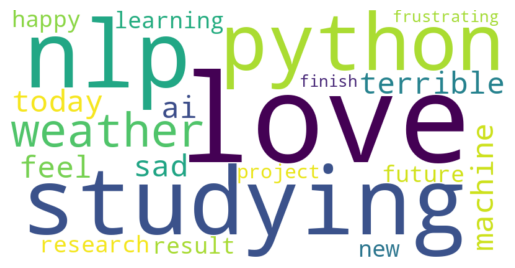

In [6]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Flatten tokens
all_words = [word for tokens in cleaned for word in tokens]
freq = Counter(all_words)

print(freq.most_common(10))

# Word Cloud
wc = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_words))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# 5 Sentiment Analysis (Basic)
We’ll use a simple Bag of Words + Naive Bayes classifier:

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Training dataset
train_texts = [
    "I love this!", "This is amazing", "I feel great",
    "I hate this", "This is terrible", "I feel bad"
]
train_labels = ["pos", "pos", "pos", "neg", "neg", "neg"]

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_texts)

model = MultinomialNB()
model.fit(X_train, train_labels)

# Predict sentiment of collected tweets
X_test = vectorizer.transform(tweets)
predictions = model.predict(X_test)

for t, p in zip(tweets, predictions):
    print(f"{t} --> {p}")

I love studying NLP and Python! --> pos
The weather is terrible today. I feel sad. --> neg
AI and machine learning are the future. --> neg
I am so happy with my new research results! --> neg
This project is frustrating, but I will finish it. --> neg


## At this point, students can:

* Clean & preprocess them (tokenization, stopwords, lemmatization).

* Visualize frequent words.

* Do basic sentiment classification.

# Next:

# 6 TF-IDF (Term Frequency–Inverse Document Frequency)

TF-IDF membantu kita menemukan kata-kata penting dalam dokumen.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(tweets)

print("Feature Names:", tfidf.get_feature_names_out())
print("TF-IDF Matrix:\n", X_tfidf.toarray())

Feature Names: ['ai' 'am' 'and' 'are' 'but' 'feel' 'finish' 'frustrating' 'future'
 'happy' 'is' 'it' 'learning' 'love' 'machine' 'my' 'new' 'nlp' 'project'
 'python' 'research' 'results' 'sad' 'so' 'studying' 'terrible' 'the'
 'this' 'today' 'weather' 'will' 'with']
TF-IDF Matrix:
 [[0.         0.         0.37410477 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.46369322 0.         0.         0.         0.46369322
  0.         0.46369322 0.         0.         0.         0.
  0.46369322 0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.39835162
  0.         0.         0.         0.         0.32138758 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.39835162 0.
  0.         0.39835162 0.32138758 0.         0.39835162 0.39835162
  0.         0.        ]
 [0.39835162 0.         0.32138758 0.39835

# 7 Topic Modeling with LDA (Latent Dirichlet Allocation)

Digunakan untuk menemukan topik tersembunyi dari kumpulan teks.

In [9]:
from sklearn.decomposition import LatentDirichletAllocation

# LDA with 2 topics
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(X_tfidf)

# Display topics
terms = tfidf.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}:")
    print([terms[i] for i in topic.argsort()[-5:]])

Topic 0:
['terrible', 'today', 'feel', 'weather', 'is']
Topic 1:
['studying', 'python', 'nlp', 'love', 'and']


# 8 Named Entity Recognition (NER) dengan spaCy

NER berguna untuk ekstraksi entitas seperti orang, organisasi, lokasi.

In [11]:
!pip install spacy
!python -m spacy download en_core_web_sm

import spacy
nlp = spacy.load("en_core_web_sm")

doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
for ent in doc.ents:
    print(ent.text, ent.label_)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 63.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Apple ORG
U.K. GPE
$1 billion MONEY


# 9 Sentiment Analysis with Pretrained Transformers (BERT)

Kita manfaatkan Hugging Face Transformers untuk analisis sentimen dengan model BERT yang sudah dilatih.

In [12]:
!pip install transformers torch --quiet

from transformers import pipeline

# Load pretrained sentiment pipeline
sentiment = pipeline("sentiment-analysis")

sample_texts = [
    "I really love learning NLP!",
    "This is the worst research paper I've ever read.",
    "The conference was okay, not too exciting."
]

results = sentiment(sample_texts)
for t, r in zip(sample_texts, results):
    print(f"{t} --> {r}")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


I really love learning NLP! --> {'label': 'POSITIVE', 'score': 0.9995535016059875}
This is the worst research paper I've ever read. --> {'label': 'NEGATIVE', 'score': 0.9997852444648743}
The conference was okay, not too exciting. --> {'label': 'POSITIVE', 'score': 0.9937736988067627}
